In [1]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot,glrt
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="normalized_regret"
ds=get_dataset(dataset_name="fig5_full_anon")

✅ Loading data done                                                                                 
Dataset found


In [5]:
print(ds.loc[(ds["used_fidelity"]==24)&(ds["seed"]==0)])

         used_fidelity benchmark   prior algorithm     value  seed  bench_prior  simple_regret  normalized_regret
515               24.0       B-0     bad       A-0  0.148454   0.0      B-0_bad       0.008032           0.020664
1031              24.0       B-0     bad       A-1  0.202752   0.0      B-0_bad       0.062330           0.160360
1676              24.0       B-0     bad       A-2  0.182050   0.0      B-0_bad       0.041628           0.107100
2192              24.0       B-1     bad       A-0  0.028709   0.0      B-1_bad       0.004449           0.007759
2708              24.0       B-1     bad       A-1  0.050604   0.0      B-1_bad       0.026344           0.045942
3353              24.0       B-1     bad       A-2  0.039320   0.0      B-1_bad       0.015060           0.026263
3869              24.0       B-2     bad       A-0  0.346893   0.0      B-2_bad       0.095724           0.173778
4385              24.0       B-2     bad       A-1  0.423508   0.0      B-2_bad       0.

In [9]:
# ds=ds.loc[ds[algorithm].isin(["HB","PB","RS"])]
loss="normalized_regret"

def relation_generator(df,budget_range,algos,loss="normalized_regret"):
    relation=[]
    budgets=[x for x in df[budget].unique() if budget_range[0] <= x <= budget_range[1]]

    for f, f_next in zip(budgets, budgets[1:]) :
        # print(f,f_next)
        # print(df.loc[df[budget].between(f,f_next,inclusive='left')])
        model_difference=model(formula=f"{loss} ~ {algorithm} + (1|{benchmark})",data=df.loc[df[budget].between(f,f_next,inclusive='left')],system_id=algorithm)
        contrast=model_difference.post_hoc(algorithm)[1]
        contrast_algos=contrast.loc[(contrast["Contrast"].str.contains(algos[0]))&(contrast["Contrast"].str.contains(algos[1]))]
        relation.append(0 if contrast_algos["P-val"][0]>0.05 else 1 if contrast_algos["Estimate"][0]>0 else -1)
    return relation,budgets[:-1]

relations={}
prior_combs=[["bad"],["at25"],["at25","bad"]]
for priors in prior_combs:
    relations[' '.join(priors)]=relation_generator(ds.loc[ds["prior"].isin(priors)],[1,24],["A-0","A-2"])

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for fa

In [11]:
relations["medium"]=relation_generator(ds.loc[ds["prior"].isin(["medium"])],[1,24],["A-0","A-2"])

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for fa

In [12]:
relations["good"]=relation_generator(ds.loc[ds["prior"].isin(["good"])],[1,24],["A-0","A-2"])

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for fa

Priors bad
Overtaking points: [16.54, 17.25, 17.92307692]
Recovery points: [8.92, 9.05263158, 9.54545455]

Priors at25
Overtaking points: [0]
Recovery points: [0]

Priors at25 & bad
Overtaking points: [8.44230769]
Recovery points: [2.15789474, 2.44230769, 2.67567568, 3.57692308, 3.87878788]

Priors medium
Overtaking points: [0]
Recovery points: [0]

Priors good
Overtaking points: [0]
Recovery points: [0]



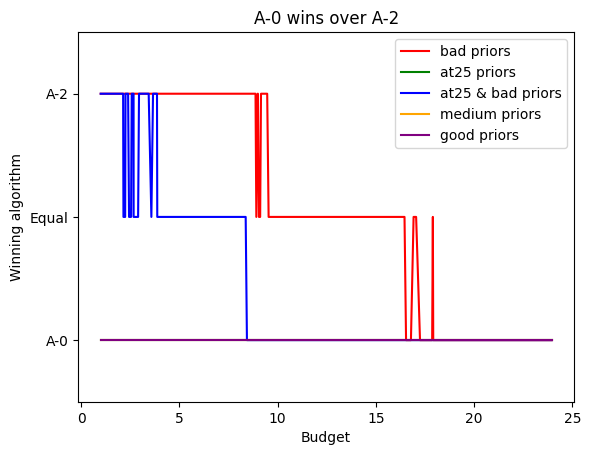

In [13]:
colors=["red","green","blue","orange","purple"]
for p_n,priors in enumerate(prior_combs+[["medium"],["good"]]):
    overtaking = []
    recovering = []
    relation,budgets=relations[' '.join(priors)]
    for i in range(len(relation)-1):
        if relation[i] >-1 and relation[i+1] == -1:
            overtaking.append(budgets[i+1])
        elif relation[i] == 1 and relation[i+1] == 0:
            recovering.append(budgets[i+1])
    if not overtaking:
        overtaking.append(0)
    if not recovering:
        recovering.append(0)
    print(f"Priors {' & '.join(priors)}")
    print(f"Overtaking points: {overtaking}")
    print(f"Recovery points: {recovering}\n")
    plt.plot(budgets, relation,color=colors[p_n],label=f'{" & ".join(priors)} priors')
plt.legend()
plt.yticks([-1,0,1],labels=["A-0","Equal","A-2"])
plt.ylim(-1.5,1.5)
# plt.xticks(budgets)
plt.xlabel('Budget')
plt.ylabel('Winning algorithm')
plt.title('A-0 wins over A-2')
plt.show()
